# Spectral Type Classification, Filter Curves and Colours with Python

Antonia Magenheim (Mat.Nr.: 11711025)  
Kayran Schmidt (Mat.Nr.: 01604789)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits

import sys
V = sys.version_info
if  (V[0], V[1], V[2]) < (3,8,2):
    print("This notebook requres the lates version of Python: 3.8.2."
          f"Your version is: {V[0]}.{V[1]}.{V[2]}")
    raise NotImplementedError

Observed spectra, like observed images, are stored in FITS files (https://de.wikipedia.org/wiki/Flexible_Image_Transport_System). The [astropy project provides the FITS module](http://docs.astropy.org/en/stable/io/fits/index.html) for reading and writing FITS files in Python. 

In this exercise we will use the following Python packages:
* Astropy to read in spectra from FITS files 
* Matplotlib to display them on screen. 
* Numpy to manipulate the spectra.

The goal of this exercise is to use the Harvard classification system to determine the spectral type of 13 stars based on the strengths of several well known absorption lines. We will also use the transmission curves for the B and V filter to derive the "colour" of the stars.

# Part 1 - Plotting spectra in Python

## 1. The FITS file

All fits files use the ``Header-Data-Unit``, or HDU to store data. This can either be as tables (1D data), images (2D data) or data cubes (3D data). A single FITS files can contain several different HDUs and they can be mixed. For example a FITS file may contain 4 images and 2 tables, each in seperate HDUs. Hence when we open a FITS file, we must also know which HDU to look at to find the data we want.

### Opening
* Choose a file to open
* Use ``fits.open()`` to get a handle to the file

  To access different HDUs, use the ``[n]`` notation after the HDU variable name, where ``n`` is the HDU number we want


* Display the header of primary (i.e. ``[0]``) HDU in the file with the ``.header`` atttribute
  
Look at the [astropy FITS module documentation](http://docs.astropy.org/en/stable/io/fits/index.html) if you need help.

In [2]:
with fits.open("A1_daten/Referenzspektren/a0i.fits") as hduList:
    print(f"This HDU List has {len(hduList)} HDU(s)\n")
    print(repr(hduList[0].header))
    hduData = hduList[0].data

This HDU List has 1 HDU(s)

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 4771 / Axis length                                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 1999' / FITS file originator        
EXTEND  =                    F / File may contain extensions                    
DATE    = '2000-02-16T18:15:34' / Date FITS file was generated                  
IRAF-TLM= '15:15:34 (16/02/2000)' / Time of last modification                   
APNUM1  = '1 1     '                                                            
WCSDIM  =                    1                                                  
CTYPE1  = 'LINEAR  '                                                            
CRVAL1  =                1150.                                                  


**Question**: The header keywords CRVAL1 and CDELT1 given the wavelength value of the first pixel ($\lambda_0$) and the bin width ($d\lambda$) in Angstroms. At what wavelength does the spectrum start?  At what wavelength does the spectrum end? How many bins are there in the spectrum?

In [3]:
CRVAL1 = 1150
CDELT1 = 5
# data points
NAXIS1 = 4771

CRVAL1 + CDELT1 * NAXIS1

25005

Given that the number of data points is available as the value of the header keyword NAXIS1 (the size of the first and only axis) and each data point is one bin,  
the parameters of the spectrum are:
- $\lambda_0 = 1150$ Angstroms
- $\lambda_{max} = 25005$  Angstroms
- number of bins $4771$

$\lambda_{max}$ is not 25000, as the right bin edge of the last bin has the value $25005$, which technically is still measured.

### Extract the data

The FITS file contains the spectrum in the ``data`` variable. Using the values from CRVAL1 and CDELT1 and the python ``range()`` function, construct two arrays: one for the spectum (y) and one for the wavelength bins (x):

In [4]:
x = np.fromiter((CRVAL1 + CDELT1*x for x in range(NAXIS1+1)), dtype=np.int_, count=(NAXIS1+1))
# hduData = hduList[0].data
y = hduData

## 2. Display the spectrum

* Use the matplotlib function ``plot()`` to draw the spectrum
* Display the spectum on logarithmic axes using ``plt.semilogy()``, ``plt.semilogx()`` or ``plt.loglog()``
* Display different regions by setting the limits of x axis with ``plt.xlim(xmin, xmax)``

If you need help, see [the matplotlib website]() or simply [google](www.google.at) the problem. You'll be suprised how much help there is for plotting in python.

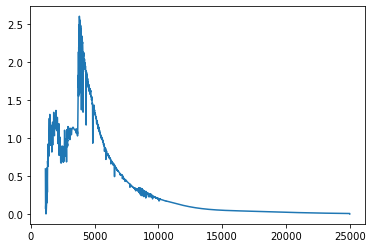

In [5]:
plt.plot(x[:-1], y)

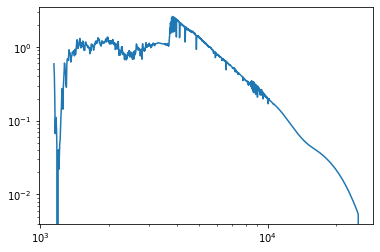

In [6]:
plt.loglog(x[:-1], y)

(1300.0, 9000.0)

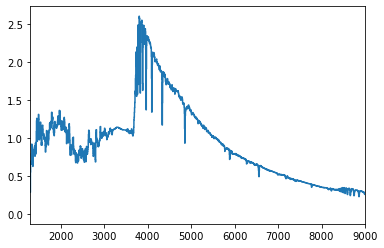

In [7]:
plt.step(x[:-1], y)
plt.xlim(1300, 9000)

(3500.0, 6000.0)

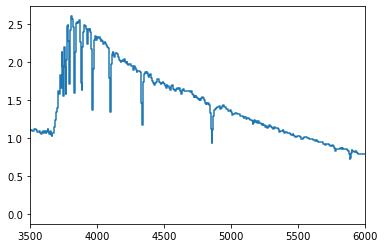

In [8]:
plt.step(x[:-1], y)
plt.xlim(3500, 6000)

**Question:** At what wavelengths are the strong absorption features? Make a list of the wavelengths for the 5 strongest features and note the relative depth of each feature.

In [9]:
base = np.array([2.57,2.5,2.37,2.13,1.85,1.4])
lineCore = np.array([1.6,1.63,1.37,1.34,1.17,0.97])
(base - lineCore)/base

array([0.37743191, 0.348     , 0.42194093, 0.37089202, 0.36756757,
       0.30714286])

rel. depth: $\frac{\text{baseline} - \text{lineCore}}{\text{baseline}}$

|Wavelength [nm] | baseline | line core | Absorption Feature (rel. depth) | Comments |
|:--------------:|:--------:|:---------:|:-------------------------------:|:--------:|
|    383 | 2.57 | 1.6 | 0.38 | 
|    388 | 2.5 | 1.63 | 0.35 |
|    397 | 2.37 | 1.37 | 0.42 |
|    410 | 2.13 | 1.34 | 0.37 |
|    434 | 1.85 | 1.17 | 0.37 |
|    486 | 1.4 | 0.94 | 0.31 |

The spectrum has a sharp edge at around 375 nm, where the absorbtion lines are hard to read and the baseline is hard to find. Therefore these parts have been left out

**Questions:** What elements create absorption features at these wavelengths? What could these elements tell us about the star? Cold, hot? Young, old? What is happening around 380 nm? Use the file ``lines.pdf`` from Moodle to help you

The drop of the spektrum arond 380 nm is called the "Balmer Jump". It happens, because the light with this wavelength has enough energy to ionize the H atoms. The energy of the light is used for ionization and the spectrum is therefore weaker.  

|Wavelength [nm] | closest Element (with line specification) |
|:--------------:|:--------:|
|    383 | ?|
|    388 | Ca K| 
|    397 |Ca H| 
|    410 |$\text{H}_{\delta}$| 
|    434 | $\text{H}_{\gamma}$| 
|    486 | $\text{H}_{\beta}$| 

Absorption lines tell us what elements the light passes through on its path to the sensor. If a line is strong (pronounced in the spectrum) it means that this element is encountered in high quantities.  
The chemical abundances of stars are used to classify them by age, temperature, and "Harvard"-scheme.
Hotter stars tend to ionize all of their heavier elements, and only the H lines stay visible.
For colder stars absorption lines for other elements than H are visible.
Some elements only form at later states of a star's life and if visible in the spectrum can hint at the age of the star.

## 3. Classify the star using the Harvard (-Yerkes) scheme

The classification scheme and a list of important spectral lines are available on moodle - ``Harvard_scheme.pdf, lines.pdf``

This scheme uses 5 main sets of lines to place stars into the well-known, but out-dated and quantitatively useless, spectral classes: OBAFG(KM)

The important lines in this classification scheme are: the Balmer Lines, Calcium H+K doublet, Calcium G line, the Sodium doublet and the Helium lines. 

Determine what spectral type each star is. To do this you should:

* read in each spectrum and plot it
* look for the important lines and follow the Harvard scheme to decide on a spectral type

File 1.fits has 1 HDU(s)
File 2.fits has 1 HDU(s)
File 3.fits has 1 HDU(s)
File 4.fits has 1 HDU(s)
File 5.fits has 1 HDU(s)
File 6.fits has 1 HDU(s)
File 7.fits has 1 HDU(s)
File 8.fits has 1 HDU(s)
File 9.fits has 1 HDU(s)
File 10.fits has 1 HDU(s)
File 11.fits has 1 HDU(s)
File 12.fits has 1 HDU(s)
File 13.fits has 1 HDU(s)


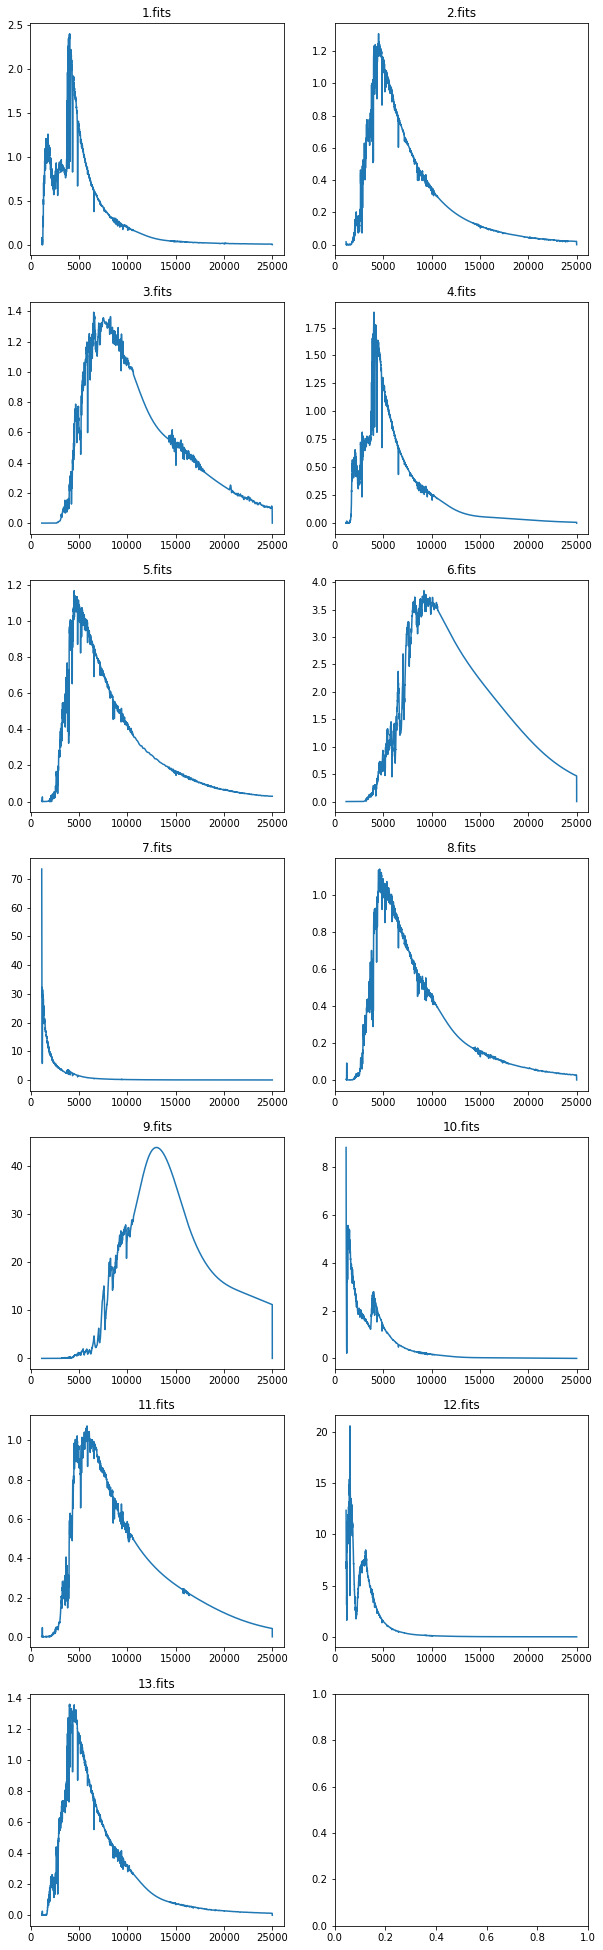

In [10]:
# plots of the spectra

# approx values for the lines to check the plots
lines = [3920,3980,4100,4300,4340,4480,4860,5180,5260,5320,5410]

fig, ax = plt.subplots(7, 2)
fig.set_size_inches(10, 35)

for i in range(13):
    with fits.open(f"A1_daten/{i+1}.fits") as hdul:
        print(f"File {i+1}.fits has {len(hdul)} HDU(s)")
        data = hdul[0].data
        crval1 = hdul[0].header["CRVAL1"]
        cdelt1 = hdul[0].header["CDELT1"]
        naxis1 = hdul[0].header["NAXIS1"]
        x = np.fromiter((crval1 + 5*x for x in range(naxis1)), dtype=np.int_, count=naxis1)
        ax[i//2][i%2].plot(x, data)
        ax[i//2][i%2].set_xlim(3500, 5500)
        ax[i//2][i%2].set_title(f"{i+1}.fits")
        for l in lines:
            ax[i//2][i%2].axvline(l, c="black")
        

fig2, ax2 = plt.subplots(7, 2)
fig2.set_size_inches(10, 35)
for i in range(13):
    with fits.open(f"A1_daten/{i+1}.fits") as hdul:
        data = hdul[0].data
        crval1 = hdul[0].header["CRVAL1"]
        cdelt1 = hdul[0].header["CDELT1"]
        naxis1 = hdul[0].header["NAXIS1"]
        x = np.fromiter((crval1 + 5*x for x in range(NAXIS1)), dtype=np.int_, count=NAXIS1)
        ax2[i//2][i%2].plot(x, data)
        ax2[i//2][i%2].set_title(f"{i+1}.fits")

It will save time if you use a ``for`` loop and plot all the stars at once - either on the same graph, or on different subplots. Here is an example for how to use subplots:

    plt.subplot(width, height, index)
    
Google [``how to use matploblib subplots``](https://matplotlib.org/2.0.0/examples/pylab_examples/subplot_demo.html)

In [11]:
# Example of using a for loop for plotting

data = np.random.random(size=(3, 10))
plt.figure(figsize=(7,2))

for i in range(3):
    # subplot always starts with 1, not 0
    plt.subplot(1, 3, i+1)
    plt.plot(data[i])

* Write down which file corresponds to which spectral type

| File    | Spectral Type (OBAFGKM) | what lines are strong? |
| --------|:----------------------: | ---------------------- |
| 1.fits  | A | $\text{H}_{\beta}$, $\text{H}_{\delta}$, $\text{H}_{\varepsilon}$ |
| 2.fits  | G | $\text{H}_{\beta}$, Ca H & K |
| 3.fits  | K / M | none |
| 4.fits  | A | $\text{H}_{\beta}$, $\text{H}_{\delta}$, $\text{H}_{\varepsilon}$ |
| 5.fits  | G | $\text{H}_{\beta}$, Ca H & K |
| 6.fits  | K / M | none |
| 7.fits  | O | none |
| 8.fits  | G | $\text{H}_{\beta}$, Ca H & K |
| 9.fits  | K / M | none |
| 10.fits | F | $\text{H}_{\beta}$, $\text{H}_{\delta}$, $\text{H}_{\varepsilon}$, Ca H & K |
| 11.fits | G | $\text{H}_{\beta}$, Ca H & K |
| 12.fits | O | none |
| 13.fits | G | $\text{H}_{\beta}$, Ca H & K |

**Questions:** Why do strong Balmer lines mean we are looking at hotter stars? What could be happening in the stars' atmosphere to cause the Calcium H+K and Calcium G lines to be strongest in solar type (F, G) stars?

Hotter stars contain mostly fully ionized metal atoms. H can still hold its electron and gets ionized by radiation. Therefore hotter stars do not have other absorption lines than the H Balmer series.

If the Calcium H+K and Calcium G lines gain stength, it means that the stars' atmospheres start to accumulate neutral atoms, which then get ionized by absorbing light. Thus they have a lower temperature.

## 4. Luminosity class

If all stars were main sequesnce stars, the Harvard system would be enough to get a rough idea of what type of star we are looking at. However stars change as they age. They evolve from main sequence stars to giant stars and thus their luminosity increases. One way to determine whether a star is a main sequence (luminosity class V) or a giant (class I to III) is to look at its spectra. 

* plot the spectra for the files 
    * ``a0v.fits`` and 
    * ``a0i.fits``

File a0v.fits has 1 HDU(s)
File a0i.fits has 1 HDU(s)


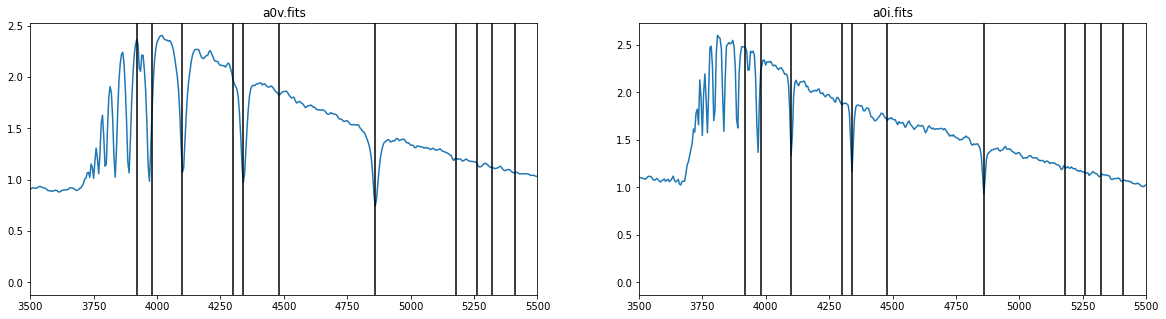

In [12]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 5)

with fits.open("A1_daten/Referenzspektren/a0v.fits") as hdul:
    print(f"File a0v.fits has {len(hdul)} HDU(s)")
    data = hdul[0].data
    crval1 = hdul[0].header["CRVAL1"]
    cdelt1 = hdul[0].header["CDELT1"]
    naxis1 = hdul[0].header["NAXIS1"]
    x = np.fromiter((crval1 + 5*x for x in range(naxis1)), dtype=np.int_, count=naxis1)
    ax[0].plot(x, data)
    ax[0].set_xlim(3500, 5500)
    ax[0].set_title("a0v.fits")
    for l in lines:
        ax[0].axvline(l, c="black")

with fits.open("A1_daten/Referenzspektren/a0i.fits") as hdul:
    print(f"File a0i.fits has {len(hdul)} HDU(s)")
    data = hdul[0].data
    crval1 = hdul[0].header["CRVAL1"]
    cdelt1 = hdul[0].header["CDELT1"]
    naxis1 = hdul[0].header["NAXIS1"]
    x = np.fromiter((crval1 + 5*x for x in range(naxis1)), dtype=np.int_, count=naxis1)
    ax[1].plot(x, data)
    ax[1].set_xlim(3500, 5500)
    ax[1].set_title("a0i.fits")
    for l in lines:
        ax[1].axvline(l, c="black")

**Question:** What differences do you note between the spectra? Give a logic-based physical explanation for these differences.

The strength of the Balmer series is weaker for a0i. Otherwise the spectra have the same overall shape and strength, which is not suprising, since they are both spectra for A type stars. That difference in the Balmer lines can hint towards less abundance of H for a0i. Less H could mean, that the star is older and has burnt the majority of its H-"fuel".

A different explanation for the weaker Balmer lines could be that the absolute values for the spectra of a0i are much higher (a0i is brighter). When renormalizing the spectra, dividing by a larger number reduces the absorption features' strengths.